# USAD

## Environment

In [249]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [250]:
# !git clone https://github.com/manigalati/usad

In [251]:
%cd /usr/local/data/elisejzh/Projects/usad

/usr/local/data/elisejzh/Projects/usad


In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from datetime import datetime
from utils import *
from usad import *

In [253]:
!nvidia-smi -L

device = get_default_device()

GPU 0: NVIDIA GeForce RTX 3090 (UUID: GPU-b7283323-3998-2b76-97e2-3017160af059)


## EDA - Data Pre-Processing

### Download dataset
This dataset is shared to me by a read-only link, so the following way of downloading can't seem to work. So the only way is to manually download and upload it to the working folder named 'input'.

In [254]:
# !mkdir input
# #normal period
# !python gdrivedl.py https://drive.google.com/open?id=1_LnLF3iDl6Rrupr0BsejXPiiQeocZaKV input/
# #anomalies
# !python gdrivedl.py https://drive.google.com/open?id=1WtFJs4_m4hpeytUrrIO5-MOilShVsDll input/

### Normal period

In [255]:
#Read data
normal = pd.read_csv("input/WADI_14days.csv",sep=',', skiprows=[0,1,2,3],skip_blank_lines=True)#, nrows=1000)
normal.shape

(1209601, 130)

In [256]:
normal = normal.drop(normal.columns[[0,1,2,50,51,86,87]],axis=1) # drop the empty columns and the date/time columns

#Downsampling
normal=normal.groupby(np.arange(len(normal.index)) // 5).mean()
normal.shape

(241921, 123)

In [257]:
# Transform all columns into float64
normal = normal.astype(float)

#### Normalization

In [258]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

# x = normal.values
# x_max=np.nanmax(x) 
# x_min=np.nanmin(x)
# x_std = (x - x_min)/(x_max - x_min)
# normal = pd.DataFrame(x_std)

In [259]:
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.798635,0.302718,0.950277,0.958459,0.515595,0.000163,0.0,0.0,0.477192,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225335,0.0,0.300885
1,0.798631,0.299764,0.950126,0.958501,0.515983,0.000183,0.0,0.0,0.477861,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214161,0.0,0.300885


In [260]:
'''Note that there exists NaN in the dataframe'''
#normal.isnull().values.any()
# normal.isnull().sum()
normal.isnull().sum().sum()

5

In [261]:
normal=normal.fillna(0)

### Attack

In [262]:
#Read data
attack = pd.read_csv("input/WADI_attackdata.csv",sep=",")#, nrows=1000)
attack.shape

(172801, 130)

In [263]:
labels=[]

attack.reset_index()
for index, row in attack.iterrows():
    date_temp=row['Date']
    date_mask="%m/%d/%Y"
    date_obj=datetime.strptime(date_temp, date_mask)
    time_temp=row['Time']
    time_mask="%I:%M:%S.%f %p"
    time_obj=datetime.strptime(time_temp,time_mask)

    if date_obj==datetime.strptime('10/9/2017', '%m/%d/%Y'):
        if time_obj>=datetime.strptime('7:25:00.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('7:50:16.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue

    if date_obj==datetime.strptime('10/10/2017', '%m/%d/%Y'):
        if time_obj>=datetime.strptime('10:24:10.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('10:34:00.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('10:55:00.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:24:00.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('11:30:40.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:44:50.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('1:39:30.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('1:50:40.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('2:48:17.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('2:59:55.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('5:40:00.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('5:49:40.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('10:55:00.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('10:56:27.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
    
    if date_obj==datetime.strptime('10/11/2017', '%m/%d/%Y'):
        if time_obj>=datetime.strptime('11:17:54.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:31:20.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('11:36:31.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:47:00.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('11:59:00.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('12:05:00.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('12:07:30.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('12:10:52.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('12:16:00.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('12:25:36.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('3:26:30.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('3:37:00.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue

    labels.append('Normal')
        


In [264]:
attack=attack.drop(attack.columns[[0,1,2,50,51,86,87]],axis=1) # Drop the empty and date/time columns

#Downsampling the attack data
attack=attack.groupby(np.arange(len(attack.index)) // 5).mean()
attack.shape

(34561, 123)

In [265]:
#Downsampling the labels
labels_down=[]
for i in range(len(labels)//5):
    if labels[5*i:5*(i+1)].count('Attack'):
        labels_down.append(1.0) #Attack
    else:
        labels_down.append(0.0) #Normal

#for the last few labels that are not within a full-length window
if labels[5*(i+1):].count('Attack'):
    labels_down.append(1.0) #Attack
else:
    labels_down.append(0.0) #Normal

print(len(labels_down))

34561


In [266]:
# '''Check if there exists NaN in the attack data'''
# #attack.isnull().values.any()
# # attack.isnull().sum()
# attack.isnull().sum().sum()

In [267]:
# Transform all columns into float64
attack = attack.astype(float)

#### Normalization

In [268]:
from sklearn import preprocessing
x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

# x = attack.values 
# x_std = (x - x_min)/(x_max - x_min)
# attack = pd.DataFrame(x_std)

In [269]:
attack.head(2)

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.766229,0.260764,0.984977,0.916341,0.575580,0.000210,0.0,0.0,0.483652,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174374,0.0,0.172566
1,0.766236,0.267854,0.984806,0.916332,0.576012,0.000131,0.0,0.0,0.483018,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174314,0.0,0.172566


### Windows

In [270]:
window_size=10

In [271]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(241911, 10, 123)

In [272]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(34551, 10, 123)

## Training

In [428]:
import torch.utils.data as data_utils

BATCH_SIZE =  8000
N_EPOCHS = 70
hidden_size = 100

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [429]:
history = training(N_EPOCHS,model,train_loader,val_loader) 

Epoch [0], val_loss1: 0.0317, val_loss2: 0.0322
Epoch [1], val_loss1: 0.0310, val_loss2: -0.0007
Epoch [2], val_loss1: 0.0394, val_loss2: -0.0157
Epoch [3], val_loss1: 0.0305, val_loss2: -0.0158
Epoch [4], val_loss1: 0.0331, val_loss2: -0.0208
Epoch [5], val_loss1: 0.0362, val_loss2: -0.0253
Epoch [6], val_loss1: 0.0335, val_loss2: -0.0248
Epoch [7], val_loss1: 0.0331, val_loss2: -0.0257
Epoch [8], val_loss1: 0.0423, val_loss2: -0.0342
Epoch [9], val_loss1: 0.0385, val_loss2: -0.0320
Epoch [10], val_loss1: 0.0362, val_loss2: -0.0305
Epoch [11], val_loss1: 0.0357, val_loss2: -0.0306
Epoch [12], val_loss1: 0.0352, val_loss2: -0.0305
Epoch [13], val_loss1: 0.0354, val_loss2: -0.0309
Epoch [14], val_loss1: 0.0347, val_loss2: -0.0306
Epoch [15], val_loss1: 0.0349, val_loss2: -0.0310
Epoch [16], val_loss1: 0.0348, val_loss2: -0.0311
Epoch [17], val_loss1: 0.0365, val_loss2: -0.0330
Epoch [18], val_loss1: 0.0370, val_loss2: -0.0336
Epoch [19], val_loss1: 0.0362, val_loss2: -0.0331
Epoch [20],

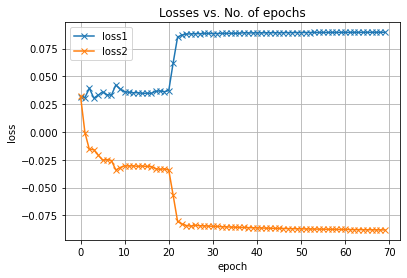

In [430]:
plot_history(history,"WADI")

In [431]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_WADI.pth")

## Testing

In [432]:
checkpoint = torch.load("model_WADI.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [433]:
results=testing(model,test_loader,alpha=.5, beta=.5)

In [434]:
windows_labels=[]
for i in range(len(labels_down)-window_size):
    windows_labels.append(list(np.int_(labels_down[i:i+window_size])))

In [435]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels] # this is with the point adjust?

In [436]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

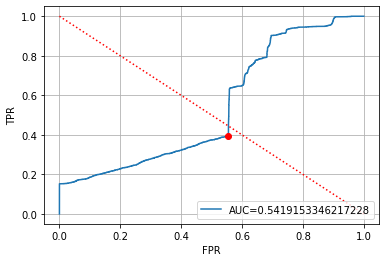

array([58.32254], dtype=float32)

In [437]:
threshold=ROC(y_test,y_pred)
threshold

In [438]:
threshold=585.15 # Select your own threshold - this is what I chose purely through trial and error
y_pred_label = [1.0 if (score > threshold) else 0 for score in y_pred ]

In [439]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
prec=precision_score(y_test,y_pred_label,pos_label=1)
recall=recall_score(y_test,y_pred_label,pos_label=1)
f1=f1_score(y_test,y_pred_label,pos_label=1)
print('precision=',prec)
print('recall=',recall)
print('f1=',f1)


precision= 0.9467455621301775
recall= 0.1523809523809524
f1= 0.2625102543068089
